## Preliminares

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

## Estatística Descritiva

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IS/Dataframes/credit_data.csv',
                 sep = ',')
df.head(5)

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   i#clientid  2000 non-null   int64  
 1   income      2000 non-null   float64
 2   age         1997 non-null   float64
 3   loan        2000 non-null   float64
 4   c#default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [ ]:
df.describe()

,i#clientid,income,age,loan,c#default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [ ]:
df['c#default'].value_counts()

c#default
0    1717
1     283
Name: count, dtype: int64

In [ ]:
df.set_index('i#clientid', inplace = True)
df.head(5)

,income,age,loan,c#default
i#clientid,,,,
1,66155.925095,59.017015,8106.532131,0
2,34415.153966,48.117153,6564.745018,0
3,57317.170063,63.108049,8020.953296,0
4,42709.534201,45.751972,6103.642260,0
5,66952.688845,18.584336,8770.099235,1


## Tratamento de Dados

In [ ]:
df = df.sample(frac = 1)

In [ ]:
df = df[df['age'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1997 entries, 1318 to 1656
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   income     1997 non-null   float64
 1   age        1997 non-null   float64
 2   loan       1997 non-null   float64
 3   c#default  1997 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 78.0 KB


In [ ]:
x = df.drop(columns = 'c#default')
y = df['c#default']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size = 0.3,
                                                 random_state = 42)

---

Preparando uma versão escalada das colunas de features

In [ ]:
scaler = StandardScaler()
cols = x.columns
values = scaler.fit_transform(x)

x_scal = pd.DataFrame(values, columns = cols)
x_scal

,income,age,loan
0,1.172457,-1.447883,0.412002
1,-0.582638,-0.517722,-1.276722
2,1.082919,1.427759,0.710263
3,1.611092,1.477860,-1.263134
4,0.555065,0.601799,-0.124841
...,...,...,...
1992,1.370816,-0.912430,2.314568
1993,-0.626111,0.468675,-1.337626
1994,-0.810895,0.472729,-1.011000
1995,-0.112600,1.051324,0.485191


In [ ]:
x_scal_train,x_scal_test,y_scal_train,y_scal_test = train_test_split(x_scal,y,
                                                                     test_size = 0.3,
                                                                     random_state = 77)

## Modelos de SAM

In [ ]:
modelos = {}

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
modelos['KNN_Raw'] = np.round(f1_score(y_test,y_pred), 2)
modelos

{'KNN_Raw': 0.34}

---

In [ ]:
knn_scal = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
x_scal

,income,age,loan
0,1.172457,-1.447883,0.412002
1,-0.582638,-0.517722,-1.276722
2,1.082919,1.427759,0.710263
3,1.611092,1.477860,-1.263134
4,0.555065,0.601799,-0.124841
...,...,...,...
1992,1.370816,-0.912430,2.314568
1993,-0.626111,0.468675,-1.337626
1994,-0.810895,0.472729,-1.011000
1995,-0.112600,1.051324,0.485191


In [ ]:
y

i#clientid
1318    0
1464    0
1408    0
221     0
494     0
       ..
1573    1
342     0
644     0
1746    0
1656    0
Name: c#default, Length: 1997, dtype: int64

In [ ]:
knn_scal.fit(x_scal_train,y_scal_train)

KNeighborsClassifier()

In [ ]:
y_scal_pred = knn_scal.predict(x_scal_test)

In [ ]:
y_scal_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
modelos['KNN-Scaled'] = np.round(f1_score(y_scal_test,y_scal_pred), 2)
modelos

{'KNN_Raw': 0.34, 'KNN-Scaled': 0.91}

##Looping

In [ ]:
KNN_loops = []
for i in range(500):
  x_loop_train,x_loop_test,y_loop_train,y_loop_test = train_test_split(x,y,
                                                                        test_size = 0.3)
  knn_loop = KNeighborsClassifier(n_neighbors = 5)
  knn_loop.fit(x_loop_train,y_loop_train)
  y_loop_pred = knn_loop.predict(x_loop_test)
  KNN_loops.append(f1_score(y_loop_test,y_loop_pred))
KNN_loops


[0.2975206611570248,
 0.37762237762237755,
 0.30769230769230765,
 0.3013698630136986,
 0.30434782608695654,
 0.3165467625899281,
 0.27972027972027974,
 0.30344827586206896,
 0.27999999999999997,
 0.29577464788732394,
 0.2753623188405797,
 0.3066666666666666,
 0.32167832167832167,
 0.33766233766233766,
 0.3862068965517241,
 0.29629629629629634,
 0.3333333333333333,
 0.24590163934426235,
 0.3393939393939394,
 0.32653061224489793,
 0.23357664233576644,
 0.23943661971830985,
 0.2666666666666666,
 0.2898550724637681,
 0.2916666666666667,
 0.2564102564102564,
 0.35064935064935066,
 0.3380281690140845,
 0.23622047244094488,
 0.3356643356643357,
 0.29370629370629375,
 0.27906976744186046,
 0.2994011976047904,
 0.23188405797101452,
 0.30985915492957744,
 0.2733812949640288,
 0.3703703703703704,
 0.35668789808917195,
 0.31578947368421045,
 0.30136986301369856,
 0.25165562913907286,
 0.3129251700680272,
 0.24358974358974356,
 0.24427480916030533,
 0.23529411764705882,
 0.3880597014925373,
 0.3243

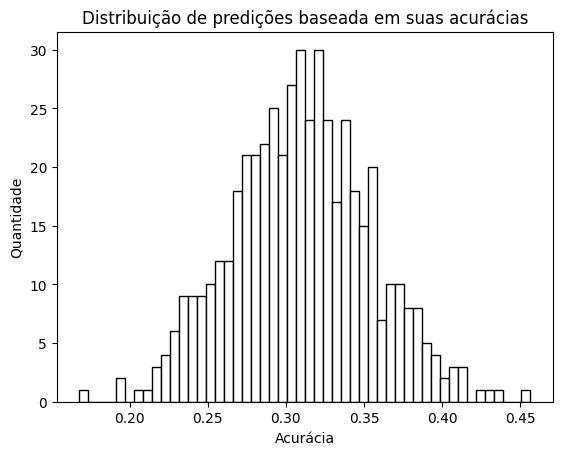

In [ ]:
plt.hist(KNN_loops,
         bins = 50,
         color = 'white',
         edgecolor = 'black')
plt.xlabel('Acurácia')
plt.ylabel('Quantidade')
plt.title('Distribuição de predições baseada em suas acurácias')
plt.show()

---

In [ ]:
KNN_scal_loops = []
for i in range(500):
  x_scal_loop_train,x_scal_loop_test,y_scal_loop_train,y_scal_loop_test = train_test_split(x_scal,y,
                                                                        test_size = 0.3)
  knn_scal_loop = KNeighborsClassifier(n_neighbors = 5)
  knn_scal_loop.fit(x_scal_loop_train,y_scal_loop_train)
  y_scal_loop_pred = knn_scal_loop.predict(x_scal_loop_test)
  KNN_scal_loops.append(f1_score(y_scal_loop_test,y_scal_loop_pred))
KNN_scal_loops


[0.9248554913294798,
 0.8979591836734694,
 0.9066666666666665,
 0.9012345679012346,
 0.935897435897436,
 0.9102564102564102,
 0.9041095890410958,
 0.9068322981366459,
 0.9,
 0.9310344827586208,
 0.9297297297297297,
 0.9506172839506174,
 0.937142857142857,
 0.9139072847682119,
 0.9221556886227544,
 0.909090909090909,
 0.9398907103825136,
 0.8938547486033519,
 0.9387755102040817,
 0.9146341463414634,
 0.935672514619883,
 0.9044585987261147,
 0.9090909090909091,
 0.9440993788819876,
 0.8622754491017964,
 0.9390243902439024,
 0.9459459459459458,
 0.8957055214723926,
 0.9204545454545455,
 0.9090909090909091,
 0.9162011173184358,
 0.8961038961038961,
 0.9213483146067417,
 0.90625,
 0.9101123595505618,
 0.9349112426035503,
 0.9010989010989011,
 0.9361702127659575,
 0.9195402298850575,
 0.9255319148936171,
 0.8944099378881988,
 0.9222222222222222,
 0.925531914893617,
 0.8848484848484849,
 0.927710843373494,
 0.9318181818181819,
 0.9281045751633986,
 0.9156626506024096,
 0.9319371727748692,
 0.

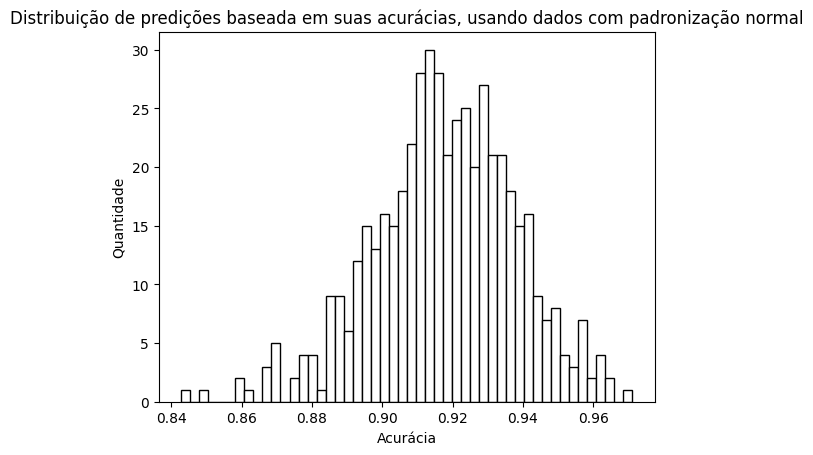

In [ ]:
plt.hist(KNN_scal_loops,
         bins = 50,
         color = 'white',
         edgecolor = 'black')
plt.xlabel('Acurácia')
plt.ylabel('Quantidade')
plt.title('Distribuição de predições baseada em suas acurácias, usando dados com padronização normal')
plt.show()